<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_Statistika_Kesehatan_%7C_Jeriko_%26_Benhard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn statsmodels openpyxl


NAMA KOLOM SETELAH NORMALISASI:
['provinsi', 'angka_harapan_hidup', 'anak_usia_12_23_bulan_yang_menerima_imunisasi', 'akses_terhadap_sanitasi_layak', 'akses_terhadap_air_minum_layak', 'jaminan_kesehatan_nasional', 'unnamed:_6', 'unnamed:_7', 'unnamed:_8']

=== STATISTIK DESKRIPTIF ===
       angka_harapan_hidup  anak_usia_12_23_bulan_yang_menerima_imunisasi  \
count            38.000000                                      38.000000   
mean             70.576447                                      60.407895   
std               2.663791                                      14.866233   
min              64.755000                                      18.410000   
25%              68.866250                                      53.537500   
50%              70.730000                                      62.130000   
75%              72.318750                                      71.447500   
max              75.530000                                      85.580000   

       akses_terhada

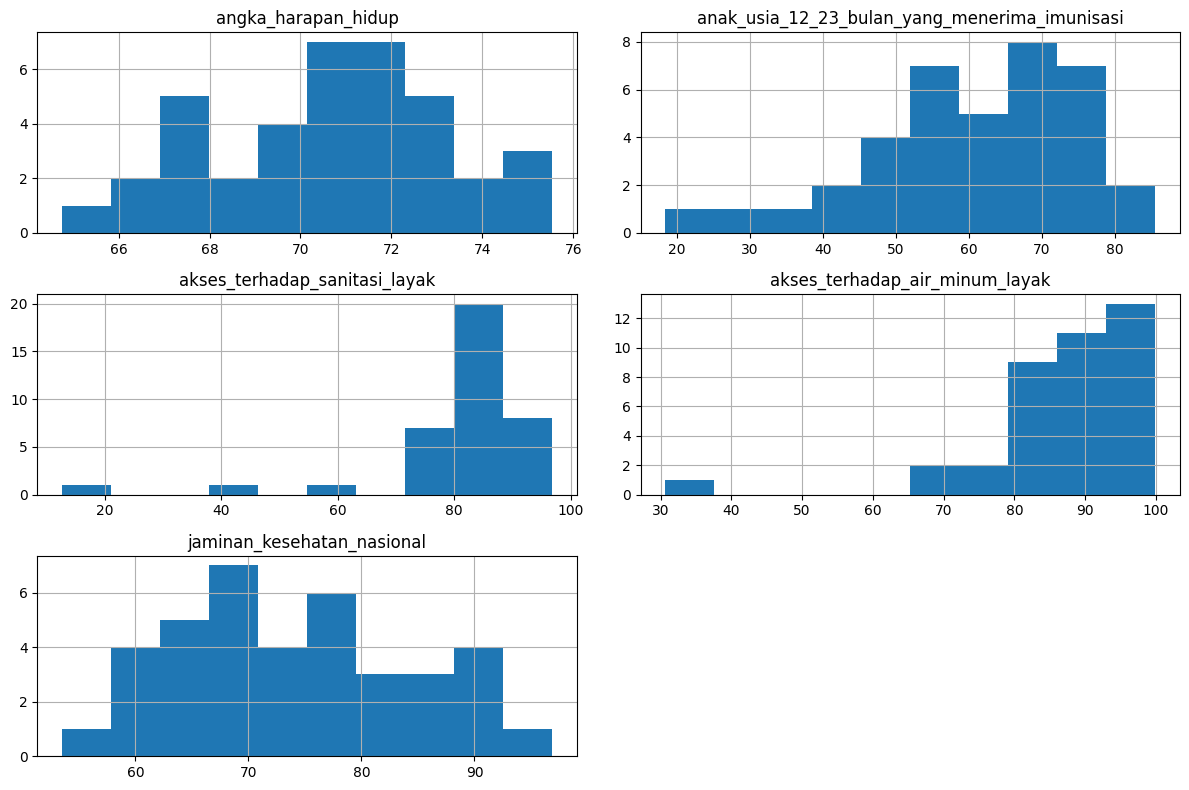

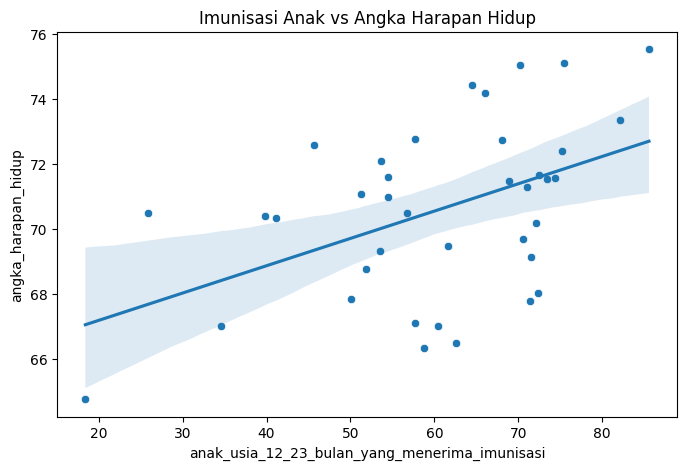


=== HASIL REGRESI LINEAR BERGANDA ===
                             OLS Regression Results                            
Dep. Variable:     angka_harapan_hidup   R-squared:                       0.419
Model:                             OLS   Adj. R-squared:                  0.349
Method:                  Least Squares   F-statistic:                     5.962
Date:                 Wed, 17 Dec 2025   Prob (F-statistic):            0.00100
Time:                         03:36:09   Log-Likelihood:                -80.310
No. Observations:                   38   AIC:                             170.6
Df Residuals:                       33   BIC:                             178.8
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/tmp/ipython-input-2414220484.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Y = {b[0]:.4f}"
/tmp/ipython-input-2414220484.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f" + {b[1]:.4f} Imunisasi Anak"
/tmp/ipython-input-2414220484.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f" + {b[2]:.4f} Akses Sanitasi Layak"
/tmp/ipython-input-2414220484.py:98: FutureWarning: Series.__getitem__ treating keys as positions i

In [6]:
# ============================================================
# IMPORT
# ============================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ============================================================
# LOAD DATA
# ============================================================
df = pd.read_excel(
    "Data untuk UAS Statistika Kesehatan.xlsx",
    sheet_name="Data Gabungan"
)

# ============================================================
# NORMALISASI NAMA KOLOM (ANTI KEYERROR)
# ============================================================
df.columns = (
    df.columns
    .str.strip()                    # hapus spasi depan & belakang
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

print("NAMA KOLOM SETELAH NORMALISASI:")
print(df.columns.tolist())

# ============================================================
# DEFINISI VARIABEL
# ============================================================

# Variabel Respon (Y)
Y = df["angka_harapan_hidup"]

# Variabel Prediktor (X)
X = df[
    [
        "anak_usia_12_23_bulan_yang_menerima_imunisasi",
        "akses_terhadap_sanitasi_layak",
        "akses_terhadap_air_minum_layak",
        "jaminan_kesehatan_nasional"
    ]
]

# ============================================================
# STATISTIKA DESKRIPTIF
# ============================================================

print("\n=== STATISTIK DESKRIPTIF ===")
print(pd.concat([Y, X], axis=1).describe())

# ============================================================
# GRAFIK (SESUI SOAL)
# ============================================================

# Histogram
pd.concat([Y, X], axis=1).hist(figsize=(12,8))
plt.tight_layout()
plt.show()

# Scatter plot (contoh: imunisasi vs AHH)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=X["anak_usia_12_23_bulan_yang_menerima_imunisasi"],
    y=Y
)
sns.regplot(
    x=X["anak_usia_12_23_bulan_yang_menerima_imunisasi"],
    y=Y,
    scatter=False
)
plt.title("Imunisasi Anak vs Angka Harapan Hidup")
plt.show()

# ============================================================
# REGRESI LINEAR BERGANDA
# ============================================================

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print("\n=== HASIL REGRESI LINEAR BERGANDA ===")
print(model.summary())

# ============================================================
# MODEL REGRESI
# ============================================================

b = model.params
print("\nMODEL REGRESI:")
print(
    f"Y = {b[0]:.4f}"
    f" + {b[1]:.4f} Imunisasi Anak"
    f" + {b[2]:.4f} Akses Sanitasi Layak"
    f" + {b[3]:.4f} Akses Air Minum Layak"
    f" + {b[4]:.4f} Jaminan Kesehatan Nasional"
)
